<a href="https://colab.research.google.com/github/CodeBrk3R/Projects/blob/master/portfolio_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HIT PLAY Button below to use each section.**

In [31]:
#@title get app libraries
from google.colab import files
import pandas as pd
import requests
from datetime import datetime
from matplotlib import pyplot as plt
import bs4
import time
import numpy as np
import seaborn as sns
try:
  import yfinance as yf
  from googlesearch import search
  import yahoo_fin.stock_info as si
except:
  !pip install google
  !pip install yfinance
  !pip install yahoo_fin
  print('----------------------------------------\n')
  import yfinance as yf
  from googlesearch import search
  import yahoo_fin.stock_info as si





def get_pe(x):
  try:
    data = si.get_quote_table(x)
    return data['PE Ratio (TTM)']
  except:
    return 'NA'
 
def stock_pairplot(stock):
  ticker = yf.Ticker(stock)
  df = ticker.history(period=f"1y")
  x = df.index
  y = df['Close']
  z = df['Volume']
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(8)
  fig.set_figwidth(18)
  fig.suptitle('Performance vs Volume')
  ax1.plot(x, y)
  ax2.plot(x, z)
 
today = datetime.today()
year = str(today.year)
 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
 
 
def get_stocklist():
  stonks = input("type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)\n")
  print('\n')
  stonks = stonks.split(" ")
  return stonks
 
def get_future(x):
  url = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  response = requests.get(url)
  html = response.content
  soup = bs4.BeautifulSoup(html, "html.parser")
  all_results=soup.find_all("span")
  if 'Buy' in all_results[15]:
    result = all_results[14].text
    return result
  elif 'Hold' in all_results[15]:
    result = all_results[14].text
    return result
  else:
    result = all_results[15].text
    return result
 
def stonks_futures(stonks):
  for item in stonks:
    try:
      fore = get_future(item)
      print(f"{item}'s 1yr projection: {fore}")
      time.sleep(1)
    except:
      print(f"{item}'s 1yr projection Not Found")
      continue
 
def get_stock(x,y=year):
  y=int(y)
  y1=y-1
  y2=y
  df = yf.download(x, 
  start=f'{y1}-01-01', 
  end=f'{y2}-12-31', 
  progress=False)
  return df
 
def base_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6),label=x)
  return plot,plt.legend()
 
def tick_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6),grid=True)
  df['MA20'] = df['Close'].rolling(20).mean()
  plot20 = df['MA20'].plot(label='MA20')
  df['MA50'] = df['Close'].rolling(50).mean()
  plot50 = df['MA50'].plot(label='MA50')
  return plot,plot20,plot50,plt.legend()
 
def Vol_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Volume'].plot(title=f"{x}\'s stock Volume",figsize = (18,6))
  return plot,plt.legend()
 
def tick_status(x,y=year):
  y=str(y)
  ticker = yf.Ticker(x)
  ticker.recommendations.reset_index(inplace = True)
  indexx = [str(item[:10]) for item in ticker.recommendations['Date'].astype('str')]
  ticker.recommendations['Date']= indexx
  ticker.recommendations.set_index('Date',inplace=True)
  df = get_stock(x,y)
  result = df.join(ticker.recommendations)
  result.fillna('none',inplace=True,axis=1)
  answer = result[result['Firm'] != 'none']
  return answer[['Close','Volume','Firm','To Grade', 'From Grade']]
 
def get_person(name,place):
  news = [j for j in search(f'{name} , {place}', tld="com", num=15, stop=15, pause=2)]
  return news

def get_news(x):
  news = [j for j in search(f'{x} stock news', tld="co.in", num=15, stop=15, pause=2)]
  return news
 
def forcast(x):
  cnn_fc = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  tr_fc = f'https://www.tipranks.com/stocks/{x}/forecast'
  return print(f'{x}\'s Forcast: ','\n',tr_fc,'\n',cnn_fc)
 
def percent_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df['returns'].plot(label=x,figsize = (18,6)),plt.legend()
 
def percent_ch(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df
 
def return_500(x):
  data = percent_plot(x)
  data2 = percent_plot('voo')
  return data,data2,plt.legend()
 
def compare_500(x):
  data = base_plot(x)
  data2 = base_plot('voo')
  return data,data2,plt.legend()
 
def best_day(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  day = str(df['Volume'].idxmax())[:10]
  news = [j for j in search(f'{x} stock news {day} ', tld="co.in", num=5, stop=5, pause=2)]
  return day,news
 
def best_plot(x):
  df=get_stock(x)
  data = df['Volume'].iloc[df['Volume'].argmax()-50:df['Volume'].argmax()+50].plot(title=f'{x} best gains',figsize=(18,6))
  return data
 
def compare_2stocks(x,y):
  data = base_plot(x)
  data2 = base_plot(y)
  return data,data2,plt.legend()
 
def get_price(x):
  price = get_stock(x,y)['Close'].round(2).iloc[-1]
  return price
 
def div_yield(x):
  try:
    div = (yf.Ticker(x).dividends[-1]*4/get_price(x))*100
    div = div.round(2)
    return div
  except:
    return '0'
 
def analyze_list(x):
  dictt={}
  for item in x:
    try:
      dictt[item] = get_future(item)
    except:
      continue
  data = pd.DataFrame(dictt.items(),columns=['ticker','1yr future'])
  data['div_yield'] = [div_yield(x) for x in data['ticker']]
  data['future%'] = [x[:-1] for x in data['1yr future'].astype(str)]
  data['future%'] = pd.to_numeric(data['future%'], downcast="float")
  data.drop(['1yr future'],axis=1,inplace=True)
  data['div_yield'] = pd.to_numeric(data['div_yield'], downcast="float")
  data['potential yield%'] = data['div_yield'] + data['future%']
  data['potential yield%'] = data['potential yield%'].round(2)
  data['current_price'] = [get_stock(x,y)['Close'].round(2).iloc[-1] for x in data['ticker']]
  data['target price'] = data['potential yield%']*.01*data['current_price']+data['current_price']
  data = data.sort_values(['potential yield%'],ascending = 0)
  recomendations=[]
  for item in data['potential yield%']:
    try:
      if item > 12:
        recomendations.append('BUY')
      elif 3 < item < 12:
        recomendations.append('hold')
      else:
        recomendations.append('SELL')
    except:
      continue
  data['recomendations'] = recomendations
  return data
 
def get_sector(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[9].get_text()[6:]
  except:
    return 'NA'
  return result
 
def get_industry(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[10].get_text()[8:]
  except:
    return 'NA'
  return result
 
def current_grade(x):
  try:
    result2 = yf.Ticker(x).recommendations.iloc[-1]['To Grade']
    return result2
  except:
    return 'None'
 
def check_cross(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(5).copy()
  if (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day crossed: UP')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA20'] < data.iloc[-2]['MA20']):
    print('close to downward cross')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) > 2).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day: steady UP Trend')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day crossed: DOWN')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('close to upward cross')
  elif (abs(data.tail(1)['MA50'] - data.tail(1)['MA20']) > 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day: steady Down Trend')
  else:
    print('NA')
 
def get_signal(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(300).copy()
  data['signal'] = 0.0
  data['signal'] = np.where(data['MA20'] > data['MA50'],1.0,0.0)
  data['pos'] = data['signal'].diff()
  data.loc[(data.pos == 1),'trade']='buy'
  data.loc[(data.pos == -1),'trade']='sell'
  check = data['trade']=='buy'
  check1 = data['trade']=='sell'
  if len(data[check1 | check]) >0 :
    return data[check1 | check]
 
def last_signal(x):
  ans = get_signal(x)
  if len(ans) >0:
    result = str(ans.tail(1).index[0])[:10],get_signal(x).tail(1)['trade'][0]
    return result
 
def get_curve():
  url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022'
  yeild_curve=pd.read_html(url)
  yeild_curve=yeild_curve[0].set_index('Date')
  yeild_curve=yeild_curve.iloc[:,7:].copy()
  return yeild_curve

def get_stuff(x):
  data2={}
  industry = get_industry(x)
  pro_grade = current_grade(x)
  sector = get_sector(x)
  data2['name']= x
  data2['sector'] = sector
  data2['industry'] = industry
  data2['20-50 MA'] = last_signal(x)
  data2['pro_grade'] = pro_grade
  data2['price'] = get_price(x)
  data2['div'] = div_yield(x)
  return data2

def stk_change_pct(stk):
  dataa=get_stock(stk)
  plt.figure(figsize=(20,10))
  plt.title(f'{stk} 90 day running %change')
  dataa["prevClose"] = dataa.Close.shift(1)
  dataa['change'] = dataa[['Open','prevClose']].pct_change()['prevClose']*100
  ax=dataa['change'].tail(90).cumsum().plot()
  xtick = pd.date_range( start=dataa.tail(90).index.min(), end=dataa.index.max(), freq='d' )
  ax.set_xticks( xtick, minor=True )
  ax.grid('on', which='minor', axis='x' )
  ax.grid('on', which='major', axis='y' )

def get_profit(x):
  try:
    data = si.get_quote_table(x)
    return f"{x} stock info",data
  except:
    return 'NA'

y = year

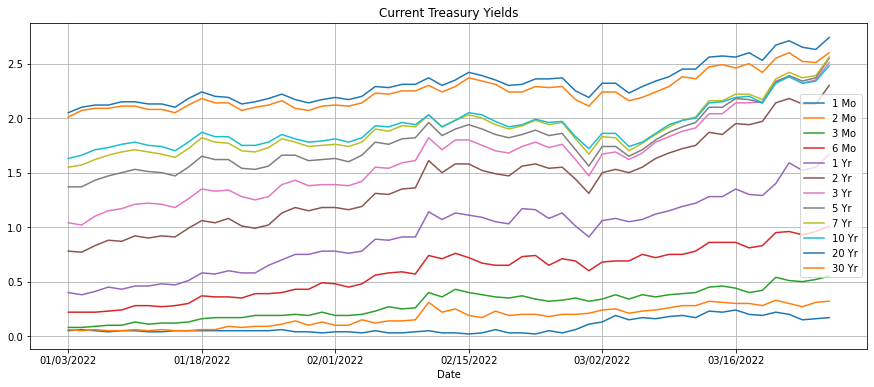

In [32]:
#@title
yeild_curve=get_curve()
yeild_curve.plot(figsize=(15,6),grid=True,title='Current Treasury Yields')

In [33]:
#@title
x=yeild_curve['10 Yr'].pct_change()
ret=(x+1).cumprod()
volitility=np.std(ret)*np.sqrt(252)

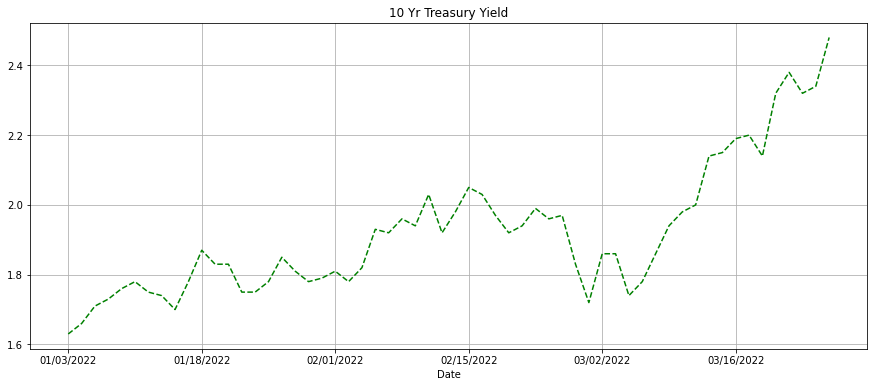

In [34]:
#@title 10 year yield
ten_yr = yeild_curve['10 Yr'].plot.line(title='10 Yr Treasury Yield',figsize=(15,6),grid=True,linestyle='--',color='green')
ten_yr

In [35]:
#@title
print('NRZ Grade: ',current_grade('nrz'))

NRZ Grade:  Outperform


In [36]:
#@title
get_profit('sbra')

('sbra stock info',
 {'1y Target Est': 15.77,
  '52 Week Range': '12.31 - 19.02',
  'Ask': '14.75 x 2900',
  'Avg. Volume': 2419390.0,
  'Beta (5Y Monthly)': 1.36,
  'Bid': '14.29 x 3000',
  "Day's Range": '14.30 - 14.68',
  'EPS (TTM)': -0.52,
  'Earnings Date': 'May 03, 2022 - May 09, 2022',
  'Ex-Dividend Date': 'Feb 10, 2022',
  'Forward Dividend & Yield': '1.20 (8.50%)',
  'Market Cap': '3.369B',
  'Open': 14.36,
  'PE Ratio (TTM)': nan,
  'Previous Close': 14.29,
  'Quote Price': 14.59000015258789,
  'Volume': 1728511.0})

In [37]:
#@title ETF CURRENT SIGNALS!
stocks = ['voo','vfh','vug','vti','qqq','vgt','vnq','mchi']
data = [[last_signal(item)[0],last_signal(item)[1],item]  for item in stocks]
data.sort()
data

[['2021-11-26', 'sell', 'mchi'],
 ['2022-01-06', 'sell', 'vug'],
 ['2022-01-07', 'sell', 'qqq'],
 ['2022-01-14', 'sell', 'vgt'],
 ['2022-01-21', 'sell', 'vti'],
 ['2022-01-25', 'sell', 'voo'],
 ['2022-01-27', 'sell', 'vnq'],
 ['2022-02-11', 'sell', 'vfh']]

stock! 
 curr Price:  10.85


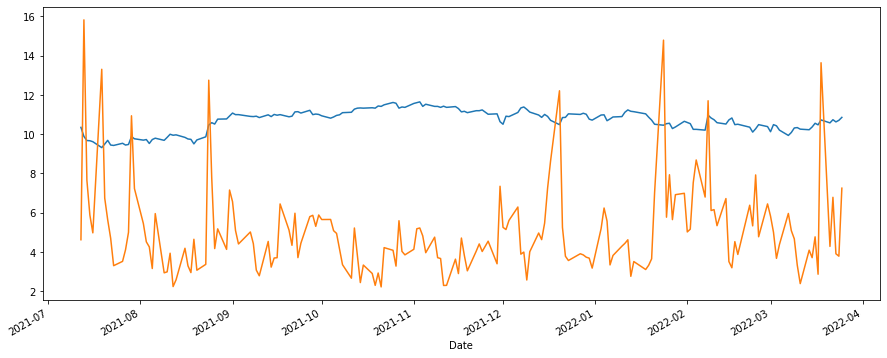

In [38]:
#@title
last = get_stock('nrz')
print( 'stock!','\n','curr Price: ',last.iloc[-1].round(2)['Close'])
last['Close'].tail(180).plot(figsize=(15,6),grid=True)
last['Volume'].tail(180).transform(lambda x: x/1000000).plot()


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7242275210>,
 <matplotlib.legend.Legend at 0x7f7240f76610>)

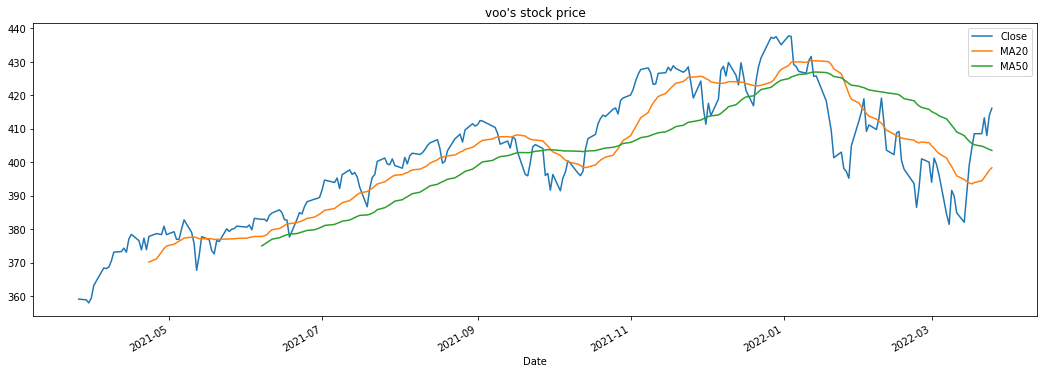

In [39]:
#@title
tick_plot('voo')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f72410827d0>,
 <matplotlib.legend.Legend at 0x7f723c787f10>)

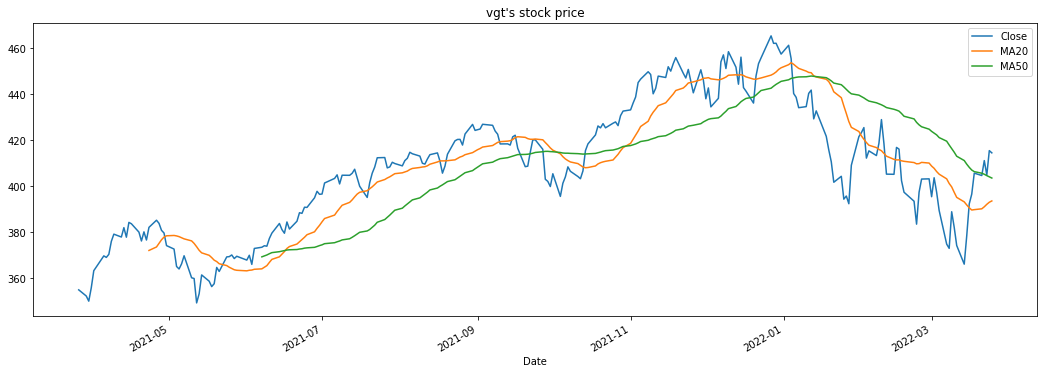

In [40]:
#@title
tick_plot('vgt')

## **MY stock list**

In [41]:
#@title my portfolio picks!
stonks = ['sbra','dlr','cold','umh','dis','c','nrz','msft','jpm','jnj','aapl','z','fb','vtr','dis','googl','sbux','o','adp','pypl','crwd','gm','tsm','amd','amzn','crm','wmt','tgt','cmg','f','dvn']
data2 = analyze_list(stonks)
data2['sector'] = [get_sector(item) for item in data2['ticker']]
data2['industry'] = [get_industry(item) for item in data2['ticker']]
data2['20-50 MA'] = [last_signal(item) for item in data2['ticker']]
data2['pro_grade'] = [current_grade(item) for item in data2['ticker']]
data2['PE Ratio'] = [get_pe(x) for x in data2['ticker']]
data2['future']=[get_profit(x)[1]['1y Target Est'] for x in data2['ticker']]

data2 = data2.reset_index(drop=True)

data2.loc[(data2.ticker == 'o'),'div_yield']=data2[data2['ticker']=='o']['div_yield']*3
data2.loc[(data2.ticker == 'o'),'potential yield%']=data2[data2['ticker']=='o']['div_yield']+data2[data2['ticker']=='o']['future%']
data2.loc[(data2.ticker == 'dis'),'div_yield']=data2[data2['ticker']=='dis']['div_yield']/4
data2.loc[(data2.ticker == 'dis'),'potential yield%']=data2[data2['ticker']=='dis']['div_yield']+data2[data2['ticker']=='dis']['future%']
data2[['div_yield','future%',	'potential yield%','target price']]=data2[['div_yield','future%',	'potential yield%','target price']].astype('float').round(2)
#data2['div_yield']=data2['div_yield'].transform(lambda x: f"{x} %")
#data2['future%']=data2['future%'].transform(lambda x: f"{x} %")
data2['signal'] =data2['20-50 MA'].transform(lambda x: x[1])
data2['alert_date'] =data2['20-50 MA'].transform(lambda x: x[0])
data2['potential yield%']=data2['potential yield%'].transform(lambda x: f"{x} %")
data2['real_deal']= round((data2['future']-data2['current_price'])/data2['future']*100)
data2.sort_values('real_deal',ascending=False)

data2

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade,PE Ratio,future,signal,alert_date,real_deal
0,gm,3.48,71.82,75.3 %,43.65,76.52,BUY,Consumer Durables,Motor Vehicles,"(2021-12-23, sell)",Equal-Weight,NA,75.29,sell,2021-12-23,42.0
1,pypl,0.00,64.75,64.75 %,113.76,187.42,BUY,Technology Services,Data Processing Services,"(2021-08-16, sell)",Neutral,27.35,272.38,sell,2021-08-16,58.0
2,tsm,1.84,48.98,50.82 %,106.73,160.97,BUY,Electronic Technology,Semiconductors,"(2022-02-15, sell)",Overweight,26.72,143.79,sell,2022-02-15,26.0
3,fb,0.00,44.26,44.26 %,221.82,320.00,BUY,Technology Services,Internet Software/Services,"(2022-01-21, sell)",Buy,15.87,401.01,sell,2022-01-21,45.0
4,crm,0.00,42.17,42.17 %,211.03,300.02,BUY,Technology Services,Packaged Software,"(2021-12-08, sell)",Outperform,116.08,327.34,sell,2021-12-08,36.0
5,z,0.00,40.20,40.2 %,52.04,72.96,BUY,Technology Services,Information Technology Services,"(2022-03-18, sell)",Buy,NaN,95.15,sell,2022-03-18,45.0
6,dis,0.63,37.27,37.9 %,139.14,194.52,BUY,Consumer Services,Cable/Satellite TV,"(2022-01-26, sell)",Buy,127.18,NaN,sell,2022-01-26,NaN
7,f,2.43,33.54,35.97 %,16.47,22.39,BUY,Consumer Durables,Motor Vehicles,"(2022-02-09, sell)",Hold,NA,19.82,sell,2022-02-09,17.0
8,sbux,2.24,30.96,33.2 %,87.45,116.48,BUY,Consumer Services,Restaurants,"(2022-01-11, sell)",Buy,NaN,NaN,sell,2022-01-11,NaN
9,amd,0.02,31.21,31.23 %,119.67,157.04,BUY,Electronic Technology,Semiconductors,"(2022-01-05, sell)",Outperform,36.91,142.50,sell,2022-01-05,16.0


In [ ]:
#@title
get_signal('nrz')

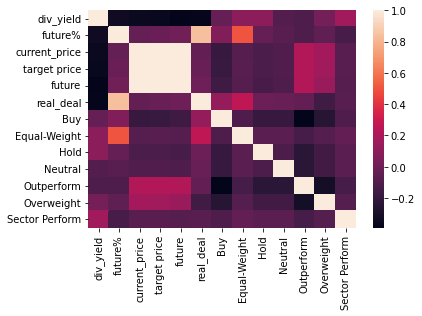

In [44]:
#@title
dummy=pd.get_dummies(data2.pro_grade)
res = pd.concat([data2, dummy], axis=1)
sns.heatmap(res.corr())

In [45]:
#@title
data2.groupby('sector').sum()
#data2['sector_potential'] = data2['future%'].groupby(data2['sector']).transform('sum')
#data2

,div_yield,future%,current_price,target price,future,real_deal
sector,,,,,,
Consumer Durables,5.91,105.36,60.12,98.91,95.11,59.0
Consumer Services,2.87,90.08,1782.96,2207.44,2007.07,22.0
Electronic Technology,2.36,90.18,401.12,511.06,461.22,42.0
Energy Minerals,6.40,2.38,62.50,67.99,51.27,-22.0
Finance,41.19,139.80,544.23,650.79,667.90,152.0
Health Technology,2.40,3.44,176.92,187.25,186.44,5.0
Retail Trade,3.21,68.18,3657.53,4551.36,4560.06,59.0
Technology Services,2.72,252.55,4176.78,5233.26,5291.86,246.0


In [46]:
#@title
data2.groupby('sector').sum()
data2['sector_potential'] = data2['future%'].groupby(data2['sector']).transform('sum')
data2

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade,PE Ratio,future,signal,alert_date,real_deal,sector_potential
0,gm,3.48,71.82,75.3 %,43.65,76.52,BUY,Consumer Durables,Motor Vehicles,"(2021-12-23, sell)",Equal-Weight,NA,75.29,sell,2021-12-23,42.0,105.36
1,pypl,0.00,64.75,64.75 %,113.76,187.42,BUY,Technology Services,Data Processing Services,"(2021-08-16, sell)",Neutral,27.35,272.38,sell,2021-08-16,58.0,252.55
2,tsm,1.84,48.98,50.82 %,106.73,160.97,BUY,Electronic Technology,Semiconductors,"(2022-02-15, sell)",Overweight,26.72,143.79,sell,2022-02-15,26.0,90.18
3,fb,0.00,44.26,44.26 %,221.82,320.00,BUY,Technology Services,Internet Software/Services,"(2022-01-21, sell)",Buy,15.87,401.01,sell,2022-01-21,45.0,252.55
4,crm,0.00,42.17,42.17 %,211.03,300.02,BUY,Technology Services,Packaged Software,"(2021-12-08, sell)",Outperform,116.08,327.34,sell,2021-12-08,36.0,252.55
5,z,0.00,40.20,40.2 %,52.04,72.96,BUY,Technology Services,Information Technology Services,"(2022-03-18, sell)",Buy,NaN,95.15,sell,2022-03-18,45.0,252.55
6,dis,0.63,37.27,37.9 %,139.14,194.52,BUY,Consumer Services,Cable/Satellite TV,"(2022-01-26, sell)",Buy,127.18,NaN,sell,2022-01-26,NaN,90.08
7,f,2.43,33.54,35.97 %,16.47,22.39,BUY,Consumer Durables,Motor Vehicles,"(2022-02-09, sell)",Hold,NA,19.82,sell,2022-02-09,17.0,105.36
8,sbux,2.24,30.96,33.2 %,87.45,116.48,BUY,Consumer Services,Restaurants,"(2022-01-11, sell)",Buy,NaN,NaN,sell,2022-01-11,NaN,90.08
9,amd,0.02,31.21,31.23 %,119.67,157.04,BUY,Electronic Technology,Semiconductors,"(2022-01-05, sell)",Outperform,36.91,142.50,sell,2022-01-05,16.0,90.18


In [56]:
#@title PRO grade Breakdown!
analysis=data2[data2['pro_grade'].str.lower().isin(['buy','market outperform','outperform','overweight','strong buy'])]
analysis2 = analysis.groupby(['pro_grade','ticker','sector','div_yield','real_deal']).sum()
analysis2.sort_values(['pro_grade','real_deal'],ascending=False)

future%  current_price  target price   future  sector_potential
pro_grade  ticker sector                div_yield real_deal                                                                 
Overweight c      Finance               3.60       31.0        26.87          56.74         74.03    81.74            139.80
           tsm    Electronic Technology 1.84       26.0        48.98         106.73        160.97   143.79             90.18
           crwd   Technology Services   0.00       25.0        15.34         221.95        256.00   294.31            252.55
           googl  Technology Services   0.00       14.0        23.53        2833.46       3500.17  3301.20            252.55
           dvn    Energy Minerals       6.40      -22.0         2.38          62.50         67.99    51.27              2.38
Outperform crm    Technology Services   0.00       36.0        42.17         211.03        300.02   327.34            252.55
           tgt    Retail Trade          1.65       24.0        28.06         218.61        283.56   285.79             68.18
           cold   Finance               3.22       23.0        17.04          27.34         32.88    35.40            139.80
           cmg    Consumer Services     0.00       22.0        21.85        1556.37       1896.44  2007.07             90.08
           amzn   Retail Trade          0.00       20.0        24.40        3295.47       4099.56  4104.88             68.18
           msft   Technology Services   0.82       18.0        21.83         303.68        372.46   369.86            252.55
           amd    Electronic Technology 0.02       16.0        31.21         119.67        157.04   142.50             90.18
           nrz    Finance               9.22       15.0        19.82          10.85         14.00    12.80            139.80
           wmt    Retail Trade          1.56       15.0        15.72         143.45        168.24   169.39             68.18
           jnj    Health Technology     2.40       5.0          3.44         176.92        187.25   186.44              3.44
Buy        fb     Technology Services   0.00       45.0        44.26         221.82        320.00   401.01            252.55
           z      Technology Services   0.00       45.0        40.20          52.04         72.96    95.15            252.55
           sbra   Finance               8.22       16.0         9.59          14.59         17.19    17.34            139.80
           umh    Finance               3.36       16.0        16.50          23.81         28.54    28.36            139.80
           aapl   Electronic Technology 0.50       0.0          9.99         174.72        193.05   174.93             90.18

In [48]:
#@title SORT
pros= data2['pro_grade'].isin(['Outperform','Buy','Overweight'])
reks= data2['recomendations']=='BUY'
buys = data2[pros & reks]
buys.sort_values('potential yield%',ascending=False)

,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,20-50 MA,pro_grade,PE Ratio,future,signal,alert_date,real_deal,sector_potential
2,tsm,1.84,48.98,50.82 %,106.73,160.97,BUY,Electronic Technology,Semiconductors,"(2022-02-15, sell)",Overweight,26.72,143.79,sell,2022-02-15,26.0,90.18
3,fb,0.00,44.26,44.26 %,221.82,320.00,BUY,Technology Services,Internet Software/Services,"(2022-01-21, sell)",Buy,15.87,401.01,sell,2022-01-21,45.0,252.55
4,crm,0.00,42.17,42.17 %,211.03,300.02,BUY,Technology Services,Packaged Software,"(2021-12-08, sell)",Outperform,116.08,327.34,sell,2021-12-08,36.0,252.55
5,z,0.00,40.20,40.2 %,52.04,72.96,BUY,Technology Services,Information Technology Services,"(2022-03-18, sell)",Buy,NaN,95.15,sell,2022-03-18,45.0,252.55
6,dis,0.63,37.27,37.9 %,139.14,194.52,BUY,Consumer Services,Cable/Satellite TV,"(2022-01-26, sell)",Buy,127.18,NaN,sell,2022-01-26,NaN,90.08
8,sbux,2.24,30.96,33.2 %,87.45,116.48,BUY,Consumer Services,Restaurants,"(2022-01-11, sell)",Buy,NaN,NaN,sell,2022-01-11,NaN,90.08
9,amd,0.02,31.21,31.23 %,119.67,157.04,BUY,Electronic Technology,Semiconductors,"(2022-01-05, sell)",Outperform,36.91,142.50,sell,2022-01-05,16.0,90.18
10,c,3.60,26.87,30.47 %,56.74,74.03,BUY,Finance,Financial Conglomerates,"(2022-03-07, sell)",Overweight,5.37,81.74,sell,2022-03-07,31.0,139.80
11,tgt,1.65,28.06,29.71 %,218.61,283.56,BUY,Retail Trade,Specialty Stores,"(2022-03-23, buy)",Outperform,16.09,285.79,buy,2022-03-23,24.0,68.18
12,nrz,9.22,19.82,29.04 %,10.85,14.00,BUY,Finance,Real Estate Investment Trusts,"(2022-02-02, sell)",Outperform,7.93,12.80,sell,2022-02-02,15.0,139.80


In [49]:
#@title SAVE to file
data2.to_csv(f'/content/drive/MyDrive/stocks/my portfolio analysis {today.date()}.csv',index=0)

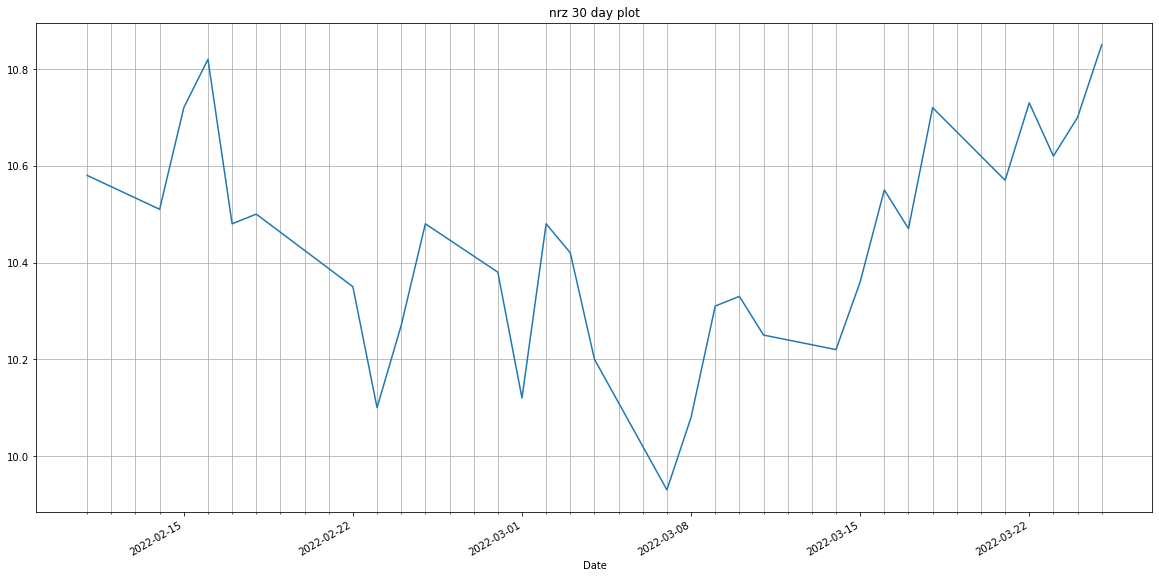

In [50]:
#@title
#stk = input('What stock ticker to check 30 days?\n')
stk = 'nrz'
dataa=get_stock(stk)
plt.figure(figsize=(20,10))
plt.title(f'{stk} 30 day plot')
ax=dataa['Close'].tail(30).plot()
xtick = pd.date_range( start=dataa.tail(30).index.min(), end=dataa.tail(30).index.max(), freq='d' )
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )

[*********************100%***********************]  2 of 2 completed


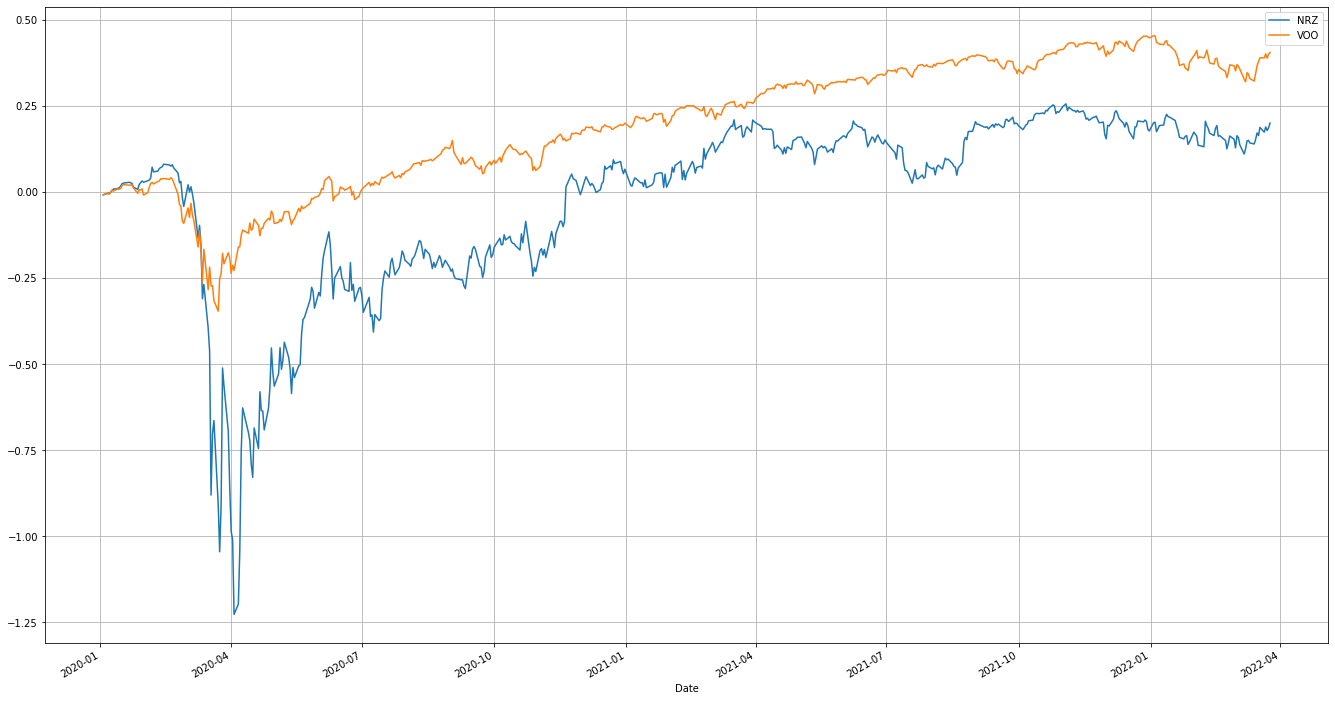

In [51]:
#@title
yf.download('voo nrz',start='2020-01-01')['Close'].pct_change().cumsum().plot(figsize=(23,13),grid=True)

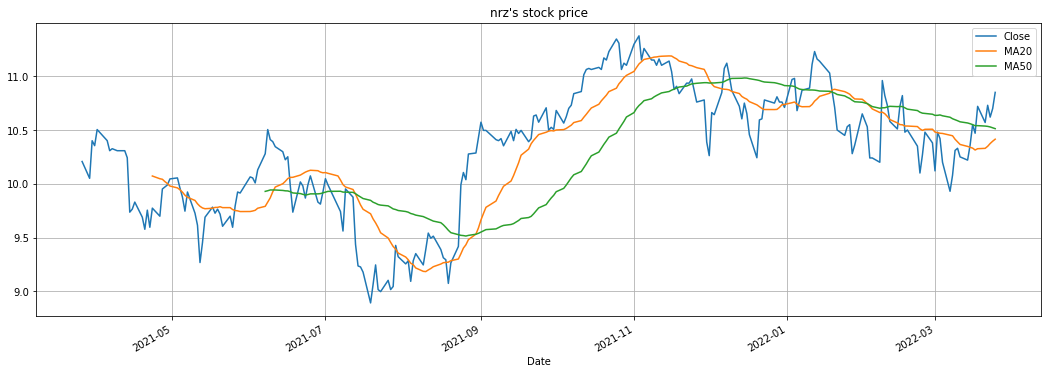

In [52]:
#@title
tick_plot(stk)
plt.grid()

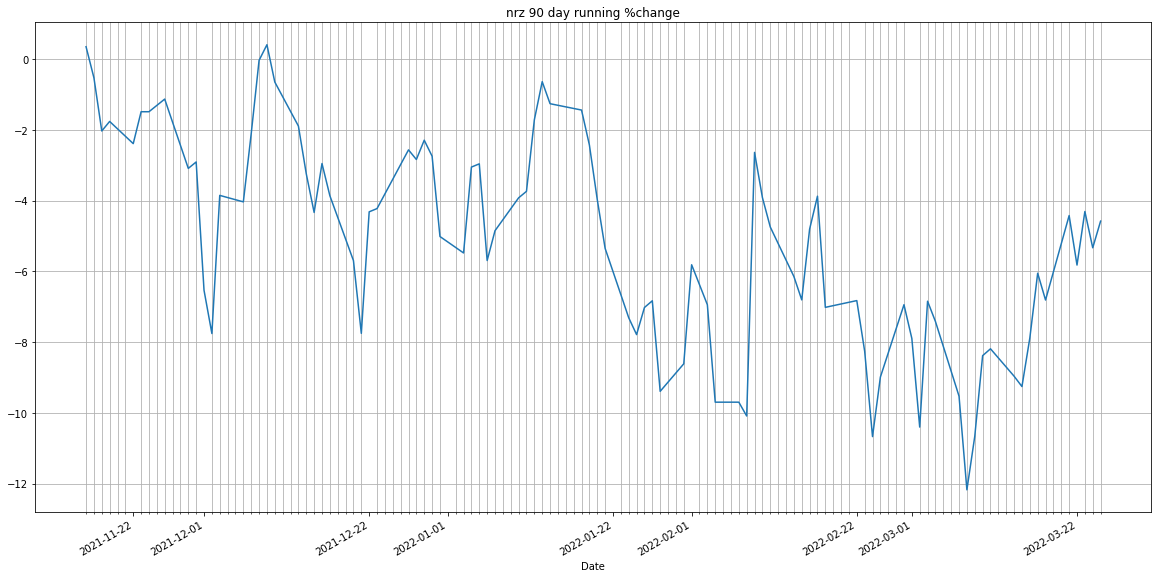

In [53]:
#@title
plt.figure(figsize=(20,10))
plt.title(f'{stk} 90 day running %change')
dataa["prevClose"] = dataa.Close.shift(1)
dataa['change'] = dataa[['Open','prevClose']].pct_change()['prevClose']*100
ax=dataa['change'].tail(90).cumsum().plot()
xtick = pd.date_range( start=dataa.tail(90).index.min(), end=dataa.index.max(), freq='d' )
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )

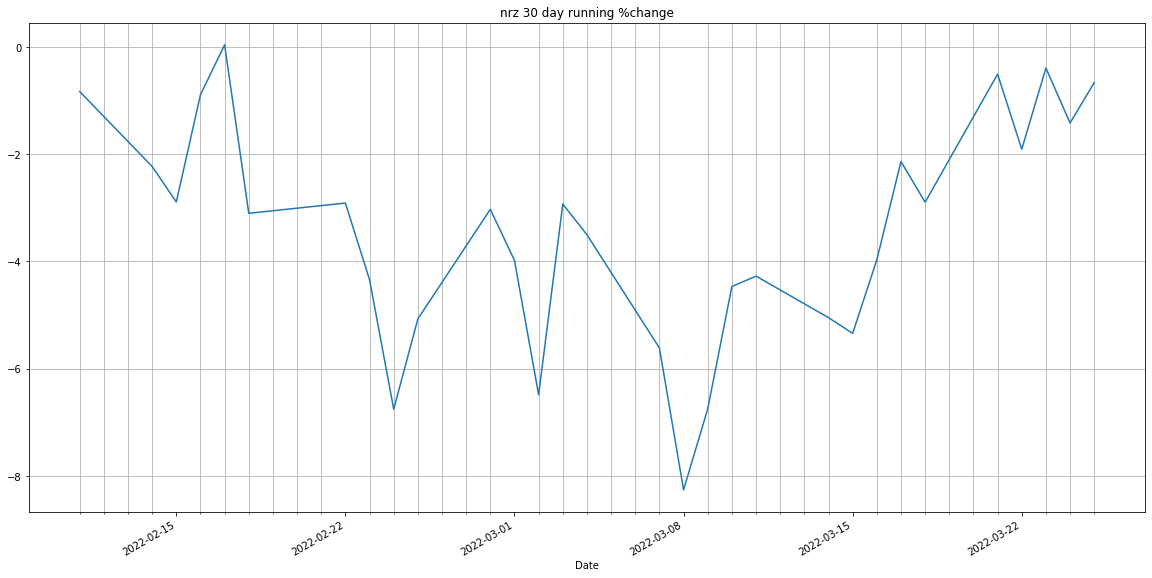

In [54]:
#@title
plt.figure(figsize=(20,10))
plt.title(f'{stk} 30 day running %change')
ax=dataa['change'].tail(30).cumsum().plot()
xtick = pd.date_range( start=dataa.tail(30).index.min(), end=dataa.index.max(), freq='d' )
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )

## **Custom enter stocklist**

In [ ]:
#@title ENTER stock list
stonnks = get_stocklist()
data1 = analyze_list(stonnks)

data1['sector'] = [get_sector(item) for item in data1['ticker']]
data1['industry'] = [get_industry(item) for item in data1['ticker']]
data1['20-50 MA'] = [last_signal(item) for item in data1['ticker']]
data1['pro_grade'] = [current_grade(item) for item in data1['ticker']]

data1['signal'] = data1['20-50 MA'].transform(lambda x: x[1])
data1['signal_date'] = data1['20-50 MA'].transform(lambda x: x[0])
data1.drop('20-50 MA', 1,inplace = True)
data1= data1.reset_index(drop=True)

data1

type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)
nrz dis pypl




,ticker,div_yield,future%,potential yield%,current_price,target price,recomendations,sector,industry,pro_grade,signal,signal_date
0,pypl,0.00,43.810001,43.810001,226.03,325.053745,BUY,Technology Services,Data Processing Services,Outperform,sell,2021-08-16
1,dis,2.08,24.389999,26.469999,168.87,213.569888,BUY,Consumer Services,Cable/Satellite TV,Equal-Weight,sell,2021-10-06
2,nrz,8.55,11.300000,19.850000,11.69,14.010465,BUY,Finance,Real Estate Investment Trusts,Market Outperform,buy,2021-08-30


In [ ]:
#@title PRO grade Breakdown!
analysis4=data1[data1['pro_grade'].str.lower().isin(['buy','market outperform','outperform','overweight'])]
analysis5 = analysis4.groupby(['pro_grade','ticker','sector','div_yield']).sum()
analysis5.sort_values(['pro_grade','future%'],ascending=False)

In [ ]:
#@title SAVE to file
data1.to_csv(f'custom stock analysis {today.date()}.csv',index=0)

***-PRO GRADE DEFINITIONS-***

Buy: Sometimes called “strong buy,” a buy rating is bullish and implies that the stock is likely to perform very well.

Outperform: Also termed “overweight” or “moderate buy.” Outperform is a mild buy rating and implies that the stock is likely to have higher returns than the overall stock market.

Hold: A hold rating is a neutral rating, often called “market perform” or “equal weight.” This rating says there is no reason to buy the stock, but no particular reason to sell it either.

Underperform: Also termed “underweight” or “moderate sell,” an underperform rating means that the stock is likely to perform slightly worse than the market as a whole.

Sell: Sometimes called “strong sell,” a sell rating is pretty rare and usually only given if the analyst is extremely bearish on the stock. This rating implies that the stock should be sold or even shorted.